# Exploratory data analysis
  
Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

### 2.1 Reading the data CSV
rubric={accuracy:3}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [1]:
spotify_df = pd.read_csv('data.csv', index_col = 0 )
spotify_df

NameError: name 'pd' is not defined

<br><br>

### 2.2 Data splitting 
rubric={accuracy:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [15]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=123)
print(train_df.shape)
print(test_df.shape)

(1613, 16)
(404, 16)


We have 1613 examples in training data, 404 examples in test data.

<br><br>

### 2.3 `describe` and `info`
rubric={accuracy:5}

**Your tasks:**

1. Show output of `info()` on the **training split**. 
2. Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
3. Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.


> Note that `describe` returns another DataFrame.

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 1505 to 1534
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1613 non-null   float64
 1   danceability      1613 non-null   float64
 2   duration_ms       1613 non-null   int64  
 3   energy            1613 non-null   float64
 4   instrumentalness  1613 non-null   float64
 5   key               1613 non-null   int64  
 6   liveness          1613 non-null   float64
 7   loudness          1613 non-null   float64
 8   mode              1613 non-null   int64  
 9   speechiness       1613 non-null   float64
 10  tempo             1613 non-null   float64
 11  time_signature    1613 non-null   float64
 12  valence           1613 non-null   float64
 13  target            1613 non-null   int64  
 14  song_title        1613 non-null   object 
 15  artist            1613 non-null   object 
dtypes: float64(10), int64(4), object(2)
mem

In [17]:
train_df_diff = train_df.describe()
(train_df_diff.loc['max'] - train_df_diff.loc['min']).sort_values()

speechiness              0.792900
danceability             0.862000
liveness                 0.950200
valence                  0.956100
instrumentalness         0.976000
energy                   0.982200
acousticness             0.994995
mode                     1.000000
target                   1.000000
time_signature           4.000000
key                     11.000000
loudness                32.790000
tempo                  171.472000
duration_ms         833918.000000
dtype: float64

speechiness returns the smallest value.

<br><br>

### 2.4 Plotting histograms 
rubric={viz:5}

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here, which I believe you have learned in 511. You'll be learning `altair` for producing prettier plots in the program and you are welcome to use it or any other tool of your choice for plotting here. 

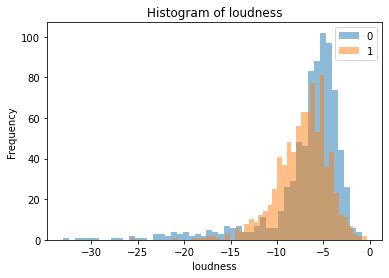

In [18]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

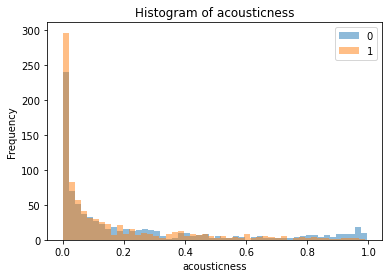

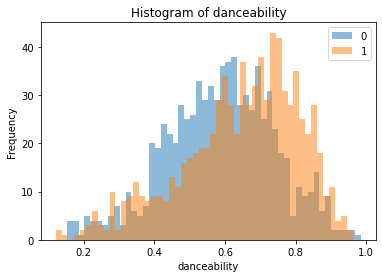

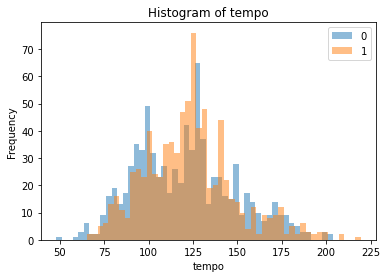

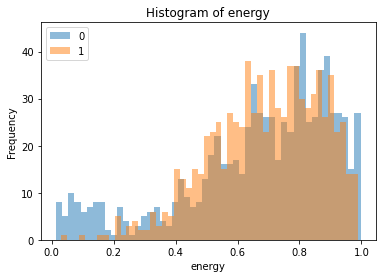

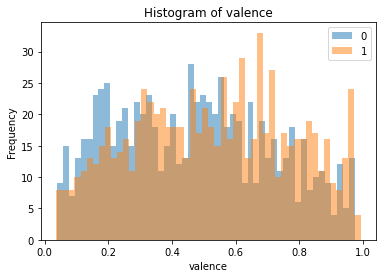

In [19]:
features = ['acousticness', 'danceability', 'tempo', 'energy', 'valence']
features
def ax(feat):
    train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

for feat in features:
    ax(feat)

<br><br>

### 2.5 Decision stump by hand 
rubric={reasoning:3}

**Your tasks:**

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

A reasonable split would be to predict 0 if energy < 0.2, otherwise, predict 1.

<br><br>

### 2.6 Identical histograms
rubric={reasoning:3}

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



Yes, the difference between the features correlate to two target classes are used to distinguish whether the example should go to either one of the target classes. If two histograms are identical, no difference can be found, hence no useful information to distinguish between to target classes.

### 2.7 Which columns to include? 
rubric={reasoning:4}

**Your tasks:**

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

`artist` can be useful in the prediction while `song_title` may be less useful. As many listeners may like the songs because of the artist, some popular singer like Taylor Swift, could be more favorable these days comparing to some older generation artists. However, song title may not be critical for user to like or dislike a song.  
Technically, DecisionTreeClassifier can handle text like categorical labels by treating them as `numeric`. But it will be difficulty to use since both `song_title` and `artist` are free text, which is not categorical labels with limited categories. The possible combinations are huge, hence hard to use them in the tree model.

<br><br><br><br>